In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


Filename="Student_performance_data .csv" #importing .csv file using pandas
df=pd.read_csv(Filename)

df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [243]:
df.drop(columns='StudentID')

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [244]:
output='GradeClass'
features=df.columns.drop([output,'StudentID']).tolist()
print(features)

['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA']


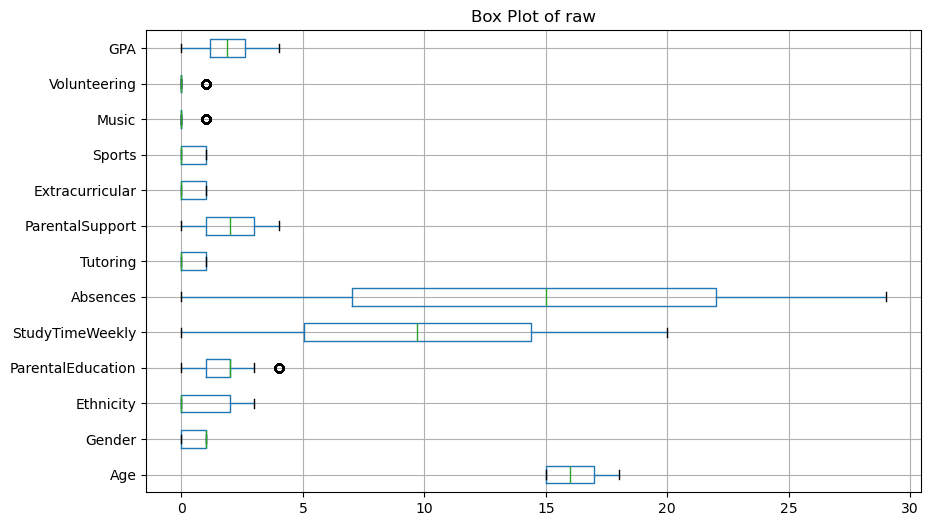

In [245]:
fig, ax=plt.subplots(figsize=(10, 6))
boxplot=df[features].boxplot(vert=0,ax=ax)
_=ax.set_title(f'Box Plot of raw')

In [246]:
df['Absences']=df['Absences']/4
df['StudyTimeWeekly']=df['StudyTimeWeekly']/6
df['Volunteering']=df['Volunteering']
df['Music']=df['Music']

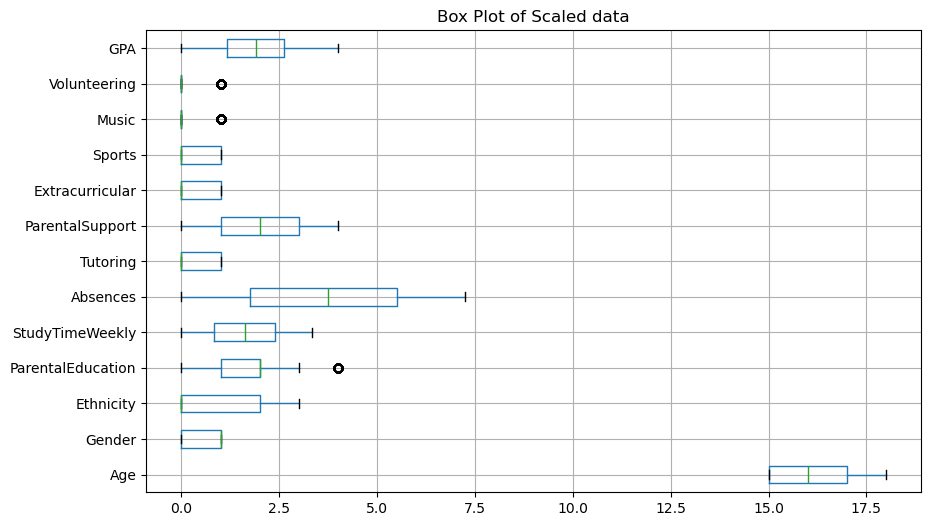

In [247]:
fig, ax=plt.subplots(figsize=(10, 6))
boxplot=df[features].boxplot(vert=0,ax=ax)
_=ax.set_title(f'Box Plot of Scaled data')

In [248]:
df = df[df["Volunteering"] <= 0.5] #remove outliers
df["Volunteering"]=df["Volunteering"]


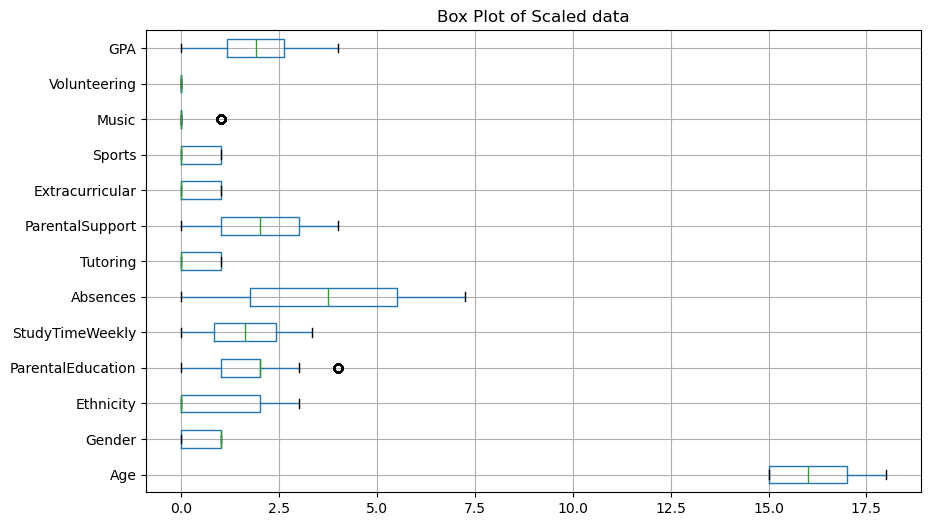

In [249]:
fig, ax=plt.subplots(figsize=(10, 6))
boxplot=df[features].boxplot(vert=0,ax=ax)
_=ax.set_title(f'Box Plot of Scaled data')

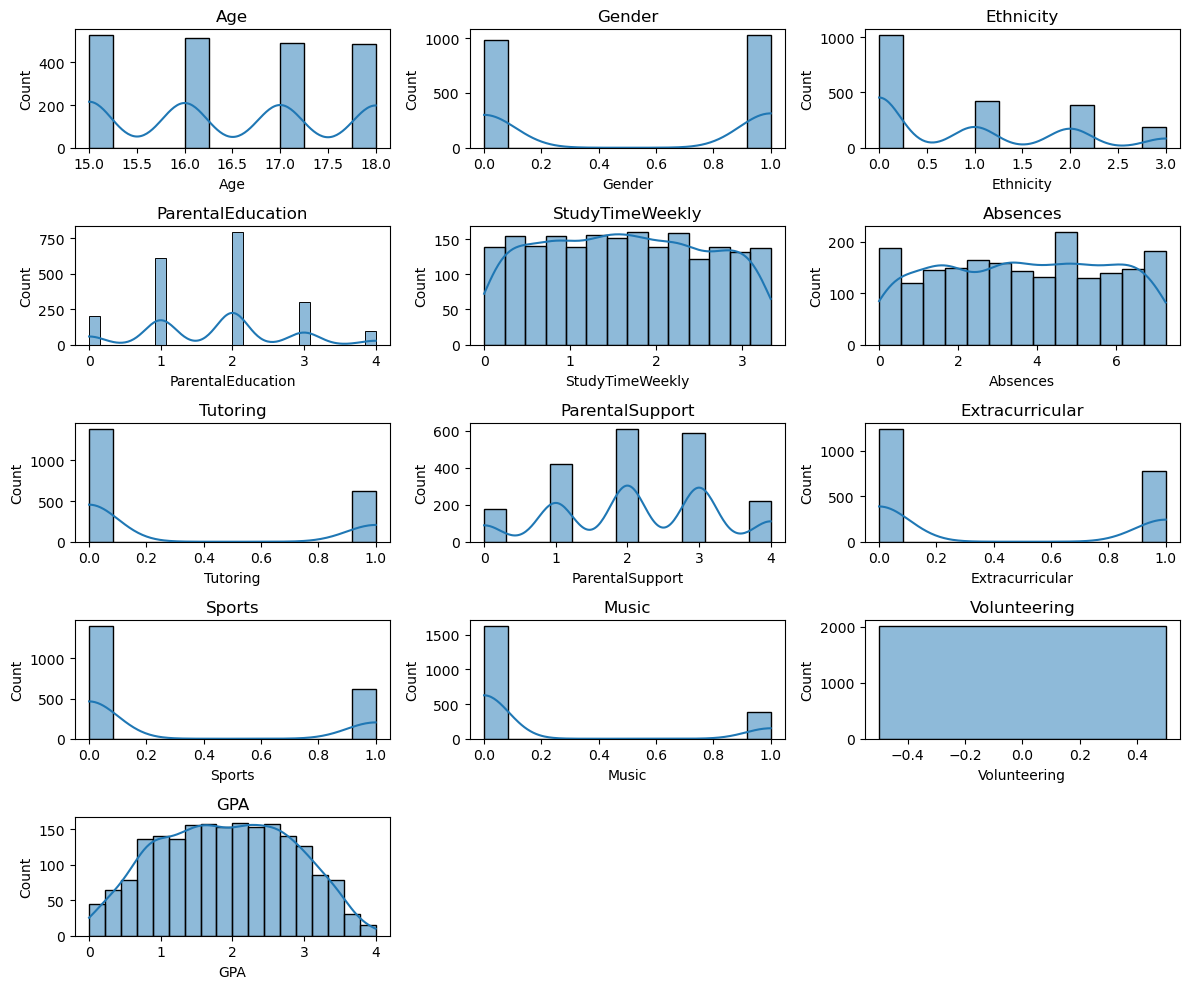

In [250]:
plt.figure(figsize=(12, 10))

for i, col in enumerate(features):

    plt.subplot(math.ceil(len(features) / 3), 3, i + 1)

    sns.histplot(df[col], kde=True)

    plt.title(col)

plt.tight_layout()

plt.show()

In [251]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()  # or StandardScaler()
df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']] = scaler.fit_transform(df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']])

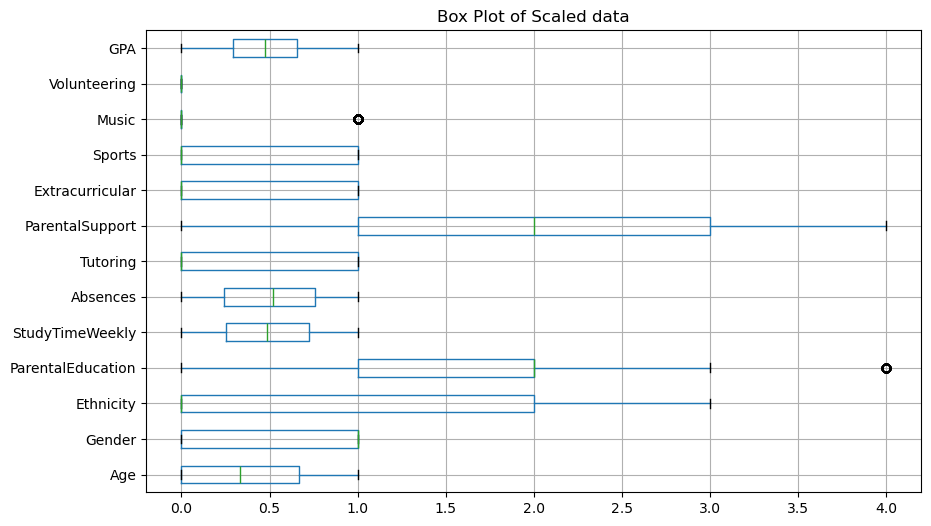

In [252]:
fig, ax=plt.subplots(figsize=(10, 6))
boxplot=df[features].boxplot(vert=0,ax=ax)
_=ax.set_title(f'Box Plot of Scaled data')